## importing necessary libraries

In [123]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [124]:
### load data set

df = pd.read_excel('weight-height.xlsx')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [125]:
### Encoding to convert categorical values into numeric values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Gender = le.fit_transform(df[['Gender']])
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


Text(0, 0.5, 'Weight')

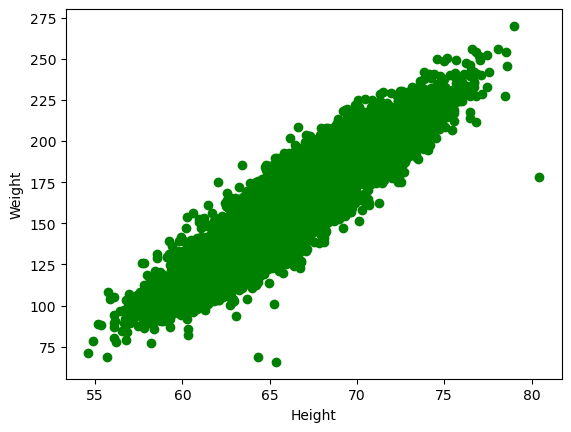

In [126]:
plt.scatter(df['Height'],df['Weight'], color = 'green')
plt.xlabel('Height')
plt.ylabel('Weight')

In [127]:
### Independent and dependent features

''' 
Breakdown:

X = df.iloc[:,:-1]:

This line creates a new DataFrame named X.
df.iloc: This selects rows and columns of df using integer-based indexing.
[:,:-1]: This is the indexing expression for selecting features:
: in the first position selects all rows (from the beginning to the end).
:-1 in the second position selects all columns except the last one. This ensures you capture only the features (independent variables).
y = df.iloc[:,-1]:

This line creates a new variable named y.
df.iloc: Similar to the first line, this uses integer-based indexing.
: in the first position again selects all rows.
-1 in the second position selects the last column of df. This is the target variable.
'''

X = df.iloc[:,:-1] ## independent features
y = df.iloc[:,-1] ## dependent features

## Applying Linear Regression

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
L_reg = LinearRegression()

In [131]:
### split data into 70% training 30% testing

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 36)

In [132]:
L_reg.fit(X_train,y_train)

LinearRegression()

In [135]:
y_pred = L_reg.predict(X_test)
y_pred

array([133.75029231, 159.52700622, 188.80957238, ..., 192.89535053,
       204.95633535, 131.62906264])

## Cost function MSE and MAE for linear regression

In [136]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [137]:
mse_Linear = mean_squared_error(y_test, y_pred)
print("Testing MSE:", mse_Linear)

Testing MSE: 102.80163434764239


In [138]:
mae_Linear = mean_absolute_error(y_test, y_pred)
print("Testing MAE:", mae)

Testing MAE: 8.867162210798597


## R-Squared for linear regression

In [139]:
L_reg.score(X_train,y_train)

0.900437206405488

In [140]:
L_reg.score(X_test,y_test)

0.8986568170075826

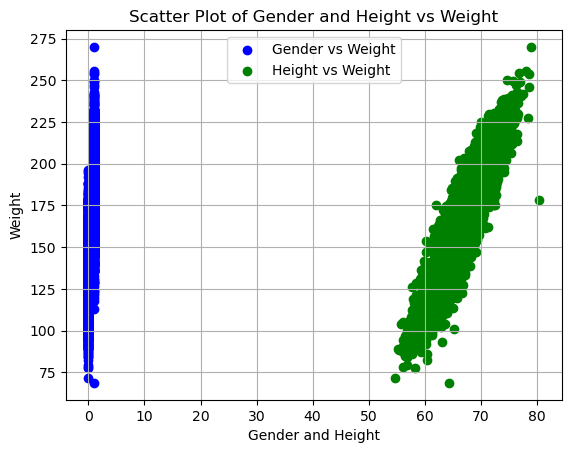

In [141]:
plt.scatter(X_train['Gender'], y_train, color='blue', label='Gender vs Weight')

plt.scatter(X_train['Height'], y_train, color='green', label='Height vs Weight')
plt.xlabel('Gender and Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Gender and Height vs Weight')
plt.legend()
plt.grid(True)
plt.show()


## Applying k-nearest neighbors (KNN)

In [142]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [143]:
KNN_reg = KNeighborsRegressor(n_neighbors=5,p=2) ## n_neighbors = 5 means it will take 5 nearest datapoint and p = euclidean distance
KNN_reg

KNeighborsRegressor()

In [144]:
### 70% training 30% testing

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 36)

In [145]:
KNN_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [146]:
y_pred = KNN_reg.predict(X_test)
y_pred

array([133.3184147 , 163.68543696, 188.98621688, ..., 187.9279176 ,
       207.02697666, 129.65998002])

# Cost function MSE and MAE for KNN

In [147]:
mse_KNN = mean_squared_error(y_test, y_pred)
print("Testing MSE:", mse)

Testing MSE: 127.53060215601928


In [148]:
mae_KNN = mean_absolute_error(y_test, y_pred)
print("Testing MAE:", mae)

Testing MAE: 8.867162210798597


## R-Squared for KNN

In [149]:
KNN_reg.score(X_train,y_train)

0.9203457032351261

In [150]:
KNN_reg.score(X_test,y_test)

0.8742786801645138

# compering KNN and Linear Regression

In [151]:
y_pred = L_reg.predict(X_test) ### Linear regression
print('linear y_prediction:',y_pred)
y_pred = KNN_reg.predict(X_test) ### KNN
print('KNN y_prediction:', y_pred)

linear y_prediction: [133.75029231 159.52700622 188.80957238 ... 192.89535053 204.95633535
 131.62906264]
KNN y_prediction: [133.3184147  163.68543696 188.98621688 ... 187.9279176  207.02697666
 129.65998002]


In [152]:
KNN_reg.fit(X_train,y_train),L_reg.fit(X_train,y_train)

(KNeighborsRegressor(), LinearRegression())

In [153]:
y_pred = KNN_reg.predict(X_test)
mse_KNN = mean_squared_error(y_test, y_pred)
print("Testing MSE for KNN:", mse)
y_pred = L_reg.predict(X_test)
mse_Linear = mean_squared_error(y_test, y_pred)
print("Testing MSE for Linear regression:", mse_Linear)

Testing MSE for KNN: 127.53060215601928
Testing MSE for Linear regression: 102.80163434764239


### as we can see Linear regression is performing better than KNN 

# KNN for Classification

In [154]:
df1 = pd.read_excel('weight-height.xlsx')
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [155]:
X = df1.iloc[:,1:3] ### Independent variables
y = df1.iloc[:,0] ### dependent variables

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [157]:
KNN_classifier = KNeighborsClassifier(n_neighbors=5,p=2)
KNN_classifier

KNeighborsClassifier()

In [158]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 30)

In [159]:
KNN_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [160]:
y_prediction = KNN_classifier.predict(X_test)
y_prediction

array(['Male', 'Male', 'Male', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [161]:
from sklearn.metrics import accuracy_score

y_prediction = KNN_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.905336969224776
